<a href="https://colab.research.google.com/github/ZikGitHub/python-colab/blob/main/Math_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Distribution Curve

### Random Experiment when a die flipped over 10,000 times

In [ ]:
import pandas as pd
import numpy as np
import random

L = []

for i in range(10000):
  a = random.randint(1,6)
  L.append(a)

print(f"The length of L is: {len(L)}")
print(f"First five elements of L are: {L[:5]}")
print(f"Unique elements in L are: {list(set(L))}")

The length of L is: 10000
First five elements of L are: [4, 2, 6, 2, 4]
Unique elements in L are: [1, 2, 3, 4, 5, 6]


In [ ]:
# Create Series from above and calculate probability of each face appeared

s = (pd.Series(L).value_counts() / len(L)).sort_index()
s

,count
1,0.1696
2,0.1737
3,0.1664
4,0.1554
5,0.1684
6,0.1665


In [ ]:
# Cumulative sum
np.cumsum(s)

,count
1,0.1696
2,0.3433
3,0.5097
4,0.6651
5,0.8335
6,1.0000


<Axes: >

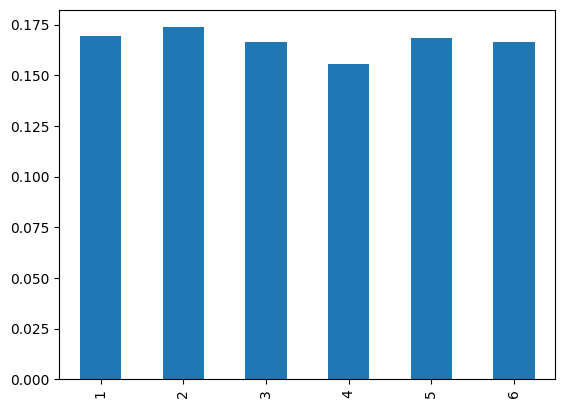

In [ ]:
# plot
s.plot(kind='bar')

<Axes: >

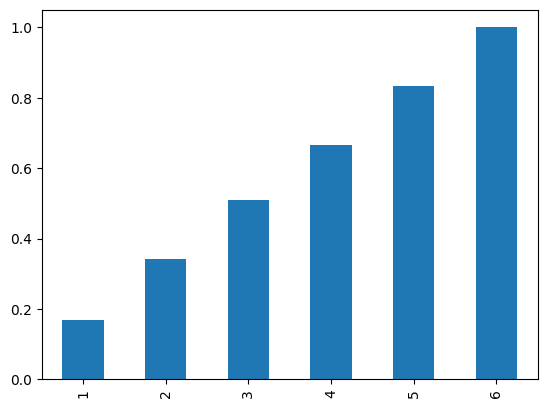

In [ ]:
np.cumsum(s).plot(kind='bar')

### Random Experiment whe 2 dies are flipped for 10,000 times

In [ ]:
import pandas as pd
import numpy as np
import random

L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)
  L.append(a+b)

print(f"The length of L is: {len(L)}")
print(f"Unique elements in L are: {list(set(L))}")
print(f"The first 10 elements in L are: {L[:10]}")


The length of L is: 10000
Unique elements in L are: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The first 10 elements in L are: [9, 11, 4, 8, 10, 11, 3, 6, 11, 9]


In [ ]:
# create Series from above and calculate probablities

s = (pd.Series(L).value_counts()/len(L)).sort_index()
s

,count
2,0.0272
3,0.0546
4,0.0845
5,0.1084
6,0.1340
7,0.1632
8,0.1404
9,0.1144
10,0.0875
11,0.0580


In [ ]:
# cumulative sum
np.cumsum(s)

,count
2,0.0272
3,0.0818
4,0.1663
5,0.2747
6,0.4087
7,0.5719
8,0.7123
9,0.8267
10,0.9142
11,0.9722


<Axes: >

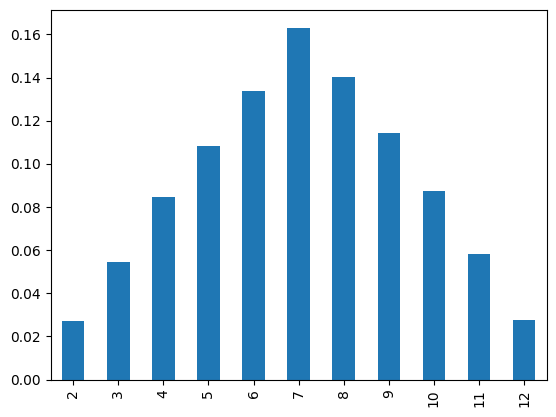

In [ ]:
# plot the graph
s.plot(kind='bar')

<Axes: >

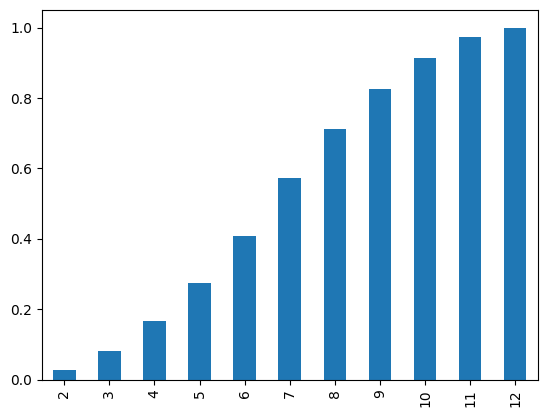

In [ ]:
# cumulative graph
np.cumsum(s).plot(kind='bar')

### Parametric Density Estimation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5, size=1000)
sample[:5]

array([49.03929303, 44.25365241, 50.09030667, 45.91653014, 52.25940793])

(array([  4.,  17.,  54., 144., 240., 249., 159., 101.,  25.,   7.]),
 array([33.11968828, 36.39922844, 39.6787686 , 42.95830876, 46.23784891,
        49.51738907, 52.79692923, 56.07646939, 59.35600955, 62.6355497 ,
        65.91508986]),
 <BarContainer object of 10 artists>)

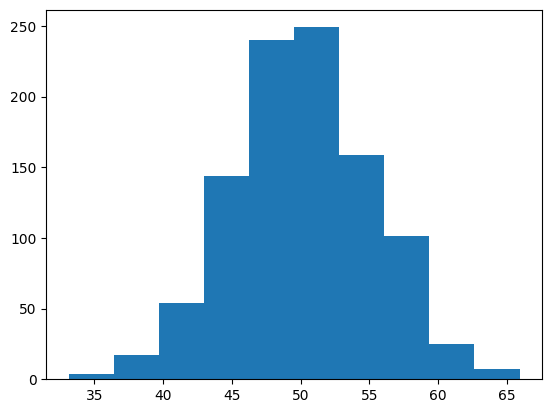

In [ ]:
# plot Histogram to understand distribution of datta
plt.hist(sample, bins=10)

In [ ]:
# calculate sample mean and sample std dev

sample_mean = sample.mean()
sample_std = sample.std()

print(f"sample mean: {sample.mean()}")
print(f"Sample standard deviation: {sample.std()}")

sample mean: 50.16535853933946
Sampel standard deviation: 5.1155828339071485


In [ ]:
# fit the distrubution with above parameters

from scipy.stats import norm
dist = norm(sample.mean(), sample.std())

In [ ]:
values = np.linspace(sample.min(), sample.max(), 100)

In [ ]:
probablities = [dist.pdf(value) for value in values]

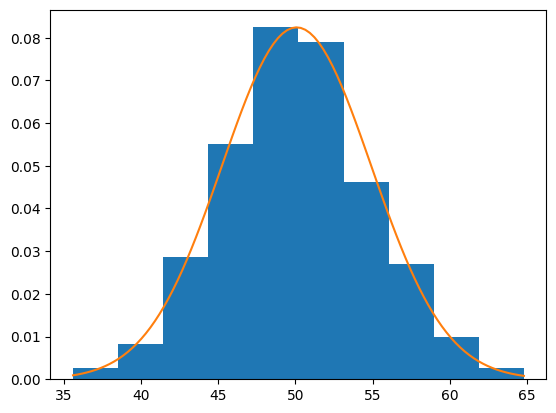

In [ ]:
# plot the histogram and pdf
plt.hist(sample, bins=10, density=True)
plt.plot(values, probablities)

<ipython-input-62-1482356190>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

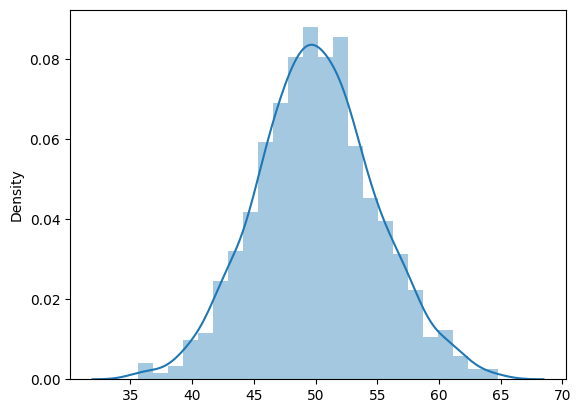

In [ ]:
import seaborn as sns
sns.distplot(sample)

### Non Parametric data distribution

In [3]:
# generate a sample
import numpy as np
from numpy.random import normal


sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [4]:
sample

array([17.59058696, 18.6443529 , 25.3211654 , 23.63699833, 27.65183156,
       12.87463875, 15.92121337, 19.87420548, 13.51679458, 26.73307833,
       22.48369661, 15.92966089, 16.77155346, 20.81971301, 13.15285299,
       25.69039636, 25.8446509 , 18.32735479, 15.85628132, 15.30097111,
       16.50859629, 20.59946106, 16.56639814, 16.81138219, 33.81786482,
       12.70447292, 17.04606898, 23.94909994, 20.0706743 , 15.91086096,
       22.20223921, 11.98568497, 24.23755959, 18.01131868, 15.22529223,
       19.01588644, 14.7919657 , 19.87411478, 24.21626302, 24.05874312,
       19.35504681, 19.18260581, 18.65833455, 15.58602046, 20.76210006,
       22.32577065, 14.51019761, 15.41326366, 26.60879334, 15.16125507,
       20.273569  , 24.43546898, 12.75467761, 20.06312202, 23.73384277,
       17.77801317, 12.59447145, 16.99131055, 21.02259134, 17.37036274,
       17.91409612, 13.39224972, 30.09446519, 20.56785746, 21.36301705,
       15.34344368, 21.51286814, 12.61319261, 23.16717075, 18.80

(array([ 3.,  2.,  0.,  3.,  2.,  5., 13., 14., 18., 17., 14., 27., 23.,
        21., 22., 22., 24., 19., 17., 10., 12.,  9.,  5., 12., 14., 19.,
        22., 37., 36., 45., 58., 52., 50., 70., 57., 57., 39., 33., 33.,
        21., 13.,  9.,  8.,  4.,  4.,  3.,  0.,  1.,  0.,  1.]),
 array([ 6.08930427,  7.10784891,  8.12639354,  9.14493818, 10.16348281,
        11.18202745, 12.20057208, 13.21911671, 14.23766135, 15.25620598,
        16.27475062, 17.29329525, 18.31183988, 19.33038452, 20.34892915,
        21.36747379, 22.38601842, 23.40456306, 24.42310769, 25.44165232,
        26.46019696, 27.47874159, 28.49728623, 29.51583086, 30.53437549,
        31.55292013, 32.57146476, 33.5900094 , 34.60855403, 35.62709867,
        36.6456433 , 37.66418793, 38.68273257, 39.7012772 , 40.71982184,
        41.73836647, 42.75691111, 43.77545574, 44.79400037, 45.81254501,
        46.83108964, 47.84963428, 48.86817891, 49.88672354, 50.90526818,
        51.92381281, 52.94235745, 53.96090208, 54.97944672,

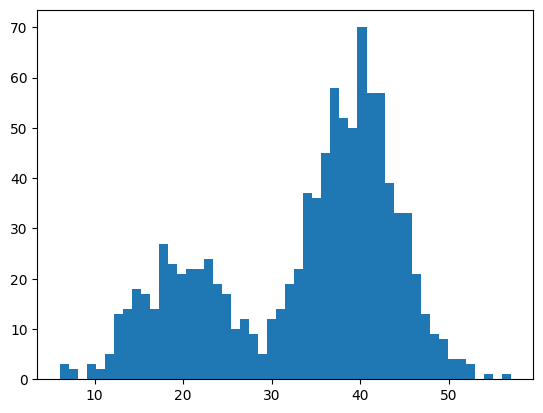

In [6]:
# plot histogram

import matplotlib.pyplot as plt

plt.hist(sample, bins=50)

In [7]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [8]:
values = np.linspace(sample.min(), sample.max(), 100)
values = values.reshape((len(values), 1))

In [9]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

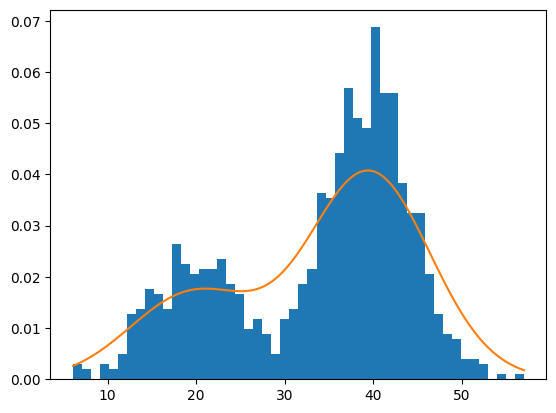

In [10]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

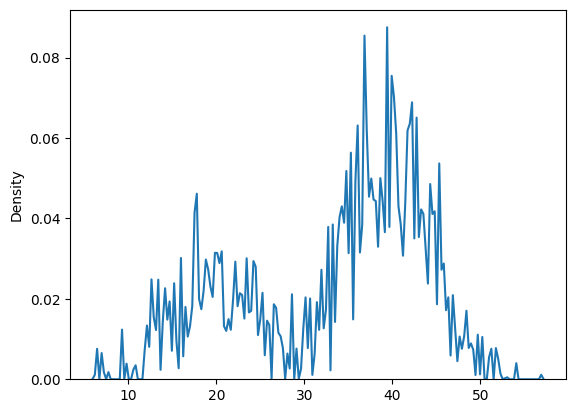

In [12]:
import seaborn as sns
sns.kdeplot(sample.reshape(1000), bw_adjust=0.02)

In [13]:
df = sns.load_dataset('iris')

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

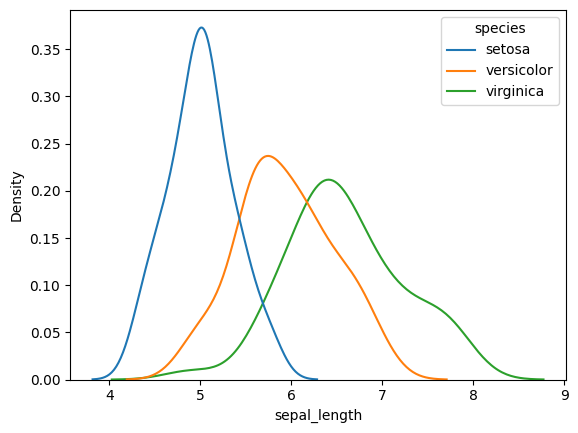

In [18]:
sns.kdeplot(data=df, x='sepal_length', hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

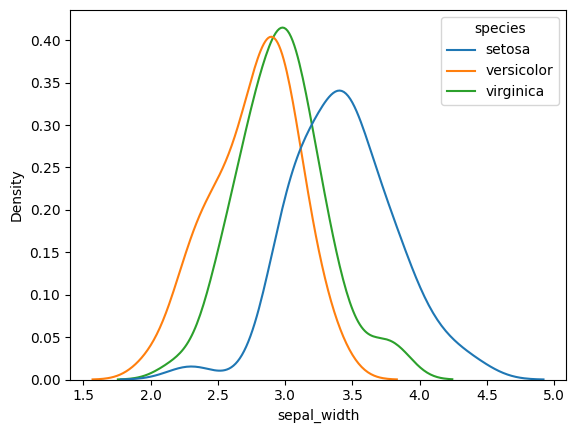

In [19]:
sns.kdeplot(data=df, x='sepal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

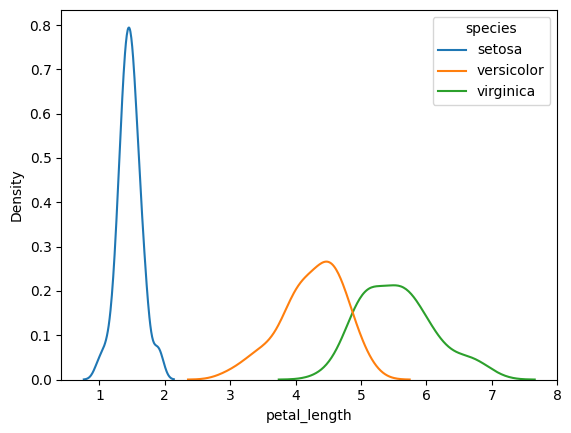

In [20]:
sns.kdeplot(data=df, x='petal_length', hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

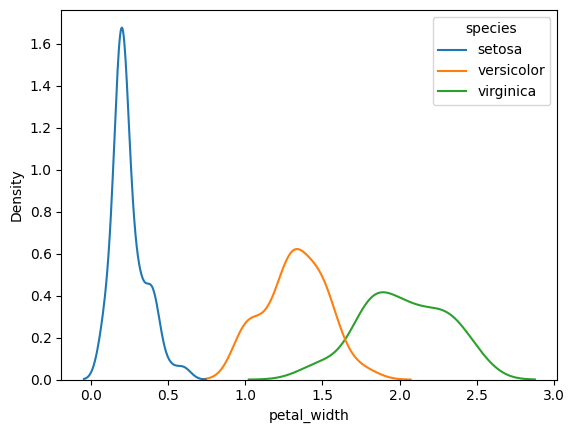

In [21]:
sns.kdeplot(data=df, x='petal_width', hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

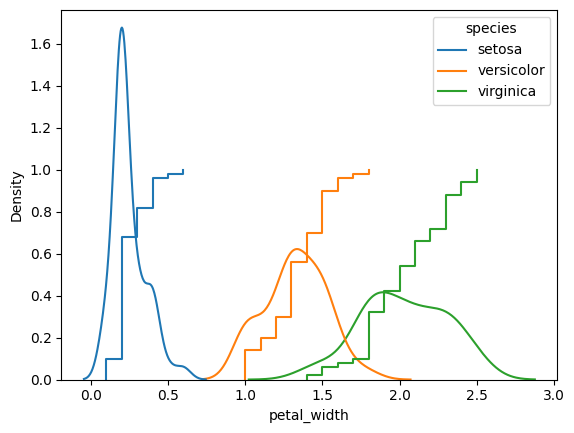

In [25]:
sns.kdeplot(x=df['petal_width'], hue=df['species'])
sns.ecdfplot(data=df, x='petal_width', hue='species')

### Titanic Dataset

In [27]:
import pandas as pd


titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

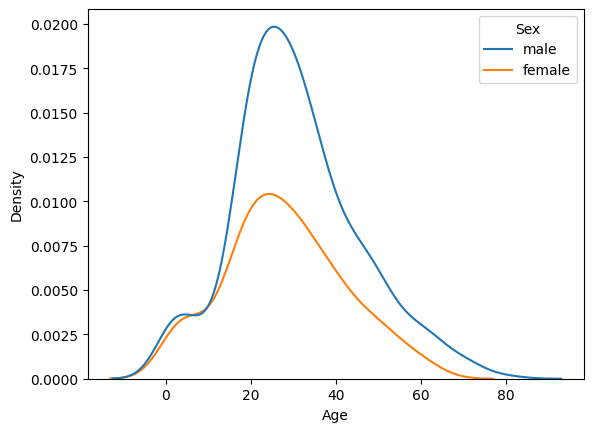

In [29]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

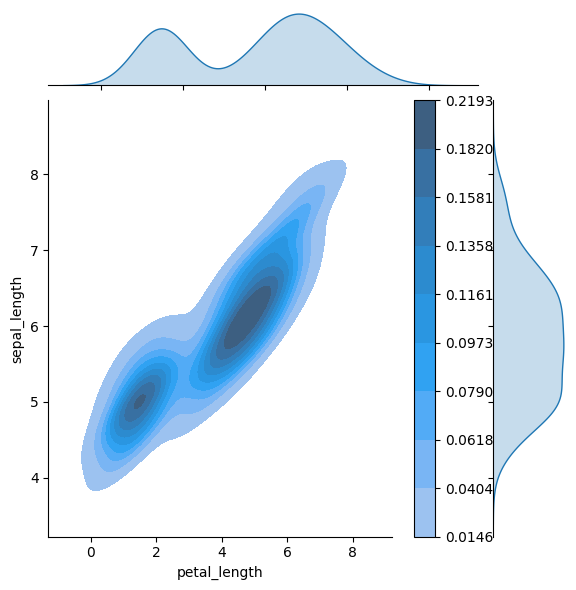

In [30]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

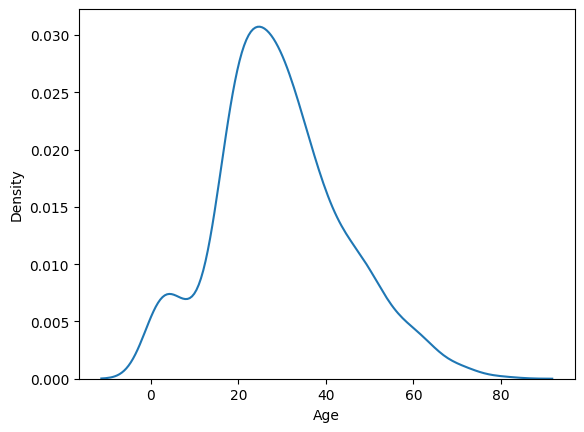

In [31]:
sns.kdeplot(titanic['Age'])

In [32]:
titanic['Age'].mean()

np.float64(29.69911764705882)

In [33]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

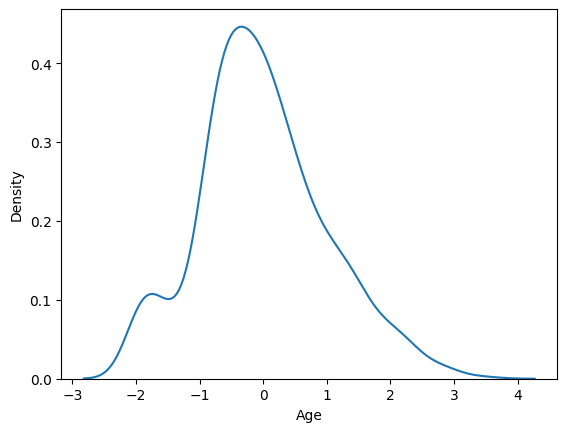

In [34]:
sns.kdeplot(x)

In [35]:
x.mean()

np.float64(2.388378943731429e-16)

In [36]:
x.std()

0.9999999999999994

In [37]:
titanic['Age'].skew()

np.float64(0.38910778230082704)

In [38]:
titanic['Age'].mean() + 3*titanic['Age'].std()

np.float64(73.27860964406095)

In [39]:
titanic['Age'].mean() - 3*titanic['Age'].std()

np.float64(-13.88037434994331)

In [40]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [41]:
titanic['Age'].max()

80.0